In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = fetch_california_housing()
print(data.DESCR)

df = pd.DataFrame(data.data, columns = data.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

There are no missing values

In [4]:
x = data.feature_names
y = data.target

categorical_data = df
numerical = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

for feature in x:
  categorical_data[feature] = categorical_data[feature].astype('category')

for feature in numerical:
  categorical_data[feature]= categorical_data[feature].cat.codes


categorical_data.drop('Latitude', axis=1, inplace=True)
categorical_data.drop('Longitude', axis=1, inplace=True)
categorical_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,12416,40,17422,4683,296,6200
1,12411,20,15292,1747,2346,2171
2,11941,51,18851,8436,469,9150
3,10269,51,13297,8416,531,6102
4,6656,51,15461,8951,538,2620
...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253
20636,3179,17,14726,13437,330,12675
20637,1037,16,9514,10951,980,3757
20638,1405,17,10299,12362,714,2249


In [5]:
dataset = pd.DataFrame({'Target':data.target})

# Add target to final dataset
new_data = pd.concat([categorical_data,dataset], axis=1)
dataset

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [6]:
all_features = list(categorical_data.columns)
new_x = categorical_data.loc[:,all_features].values

In [7]:
X = StandardScaler().fit_transform(new_x)
X

array([[ 1.88280191,  0.98214266,  1.39664548, -0.5357633 , -1.28809653,
        -0.59536054],
       [ 1.88133306, -0.60701891,  1.01265515, -1.28318843,  1.29226284,
        -1.34674917],
       [ 1.74326137,  1.85618152,  1.65426152,  0.41964764, -1.07033937,
        -0.04520009],
       ...,
       [-1.46000195, -0.92485123, -0.0289862 ,  1.05989771, -0.4271376 ,
        -1.05096799],
       [-1.35189475, -0.84539315,  0.11253136,  1.41909964, -0.76195496,
        -1.33220255],
       [-0.95618715, -1.00430931,  0.02455611,  1.36767597,  0.05117292,
        -0.46033811]])

In [8]:
x = categorical_data
y = dataset
regressor = LassoCV()
regressor.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

MedInc        0.000295
HouseAge      0.000000
AveRooms     -0.000059
AveBedrms     0.000036
Population   -0.000029
AveOccup     -0.000046
dtype: float64
L1 selected only  5  features out of  6  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

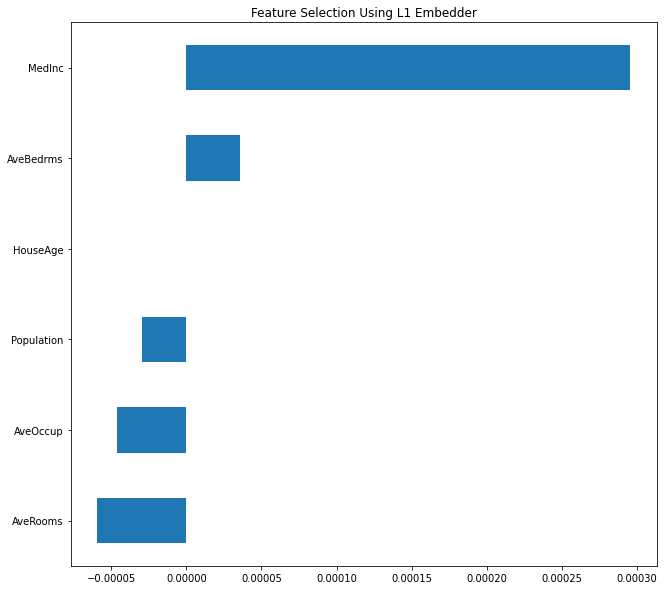

In [9]:
coef_column = pd.Series(regressor.coef_, index = df.columns)
print(coef_column)
sorted_coef = coef_column.sort_values()
matplotlib.rcParams['figure.figsize'] = (10.5, 10.0)
sorted_coef.plot(kind = "barh")

no_of_selected_features = sum(coef_column != 0)
no_of_rejected_features = sum(coef_column == 0)
total_features = no_of_selected_features + no_of_rejected_features

print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

# Feature Extraction
Using PCA, 0.9

In [10]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(X)
pca_with_varia.n_components_

n_components = 5

In [11]:
pca = PCA(n_components=5)
pc_s = pca.fit_transform(X)
pca_data=pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
final_data = pd.concat([pca_data,dataset],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,Target
0,1.706911,-2.329861,0.388309,0.247375,0.401935,4.526
1,2.290929,-0.126222,0.391002,-1.953397,0.887105,3.585
2,1.435028,-2.235347,0.139335,1.380977,1.228024,3.521
3,0.444180,-2.161565,-0.067553,0.679377,1.195552,3.413
4,-0.036368,-2.252405,-0.733710,0.517531,1.120707,3.422
...,...,...,...,...,...,...
20635,-1.241566,-0.008269,-1.564952,0.308492,-0.598347,0.781
20636,0.105980,0.096488,-1.622448,1.689767,-1.211764,0.771
20637,-0.827142,0.180851,-1.893407,-0.272037,-0.803666,0.923
20638,-0.765026,-0.200239,-2.322780,-0.152386,-0.785742,0.847


In [12]:
pca.explained_variance_ratio_

array([0.29310463, 0.22987654, 0.20008762, 0.13687952, 0.1001807 ])

In [13]:
final_data.describe()

,PC1,PC2,PC3,PC4,PC5,Target
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,-7.336186e-16,2.086402e-16,-5.816084e-16,1.043503e-16,2.638259e-16,2.068558
std,1.326165e+00,1.174447e+00,1.095712e+00,9.062654e-01,7.753150e-01,1.153956
min,-3.234607e+00,-3.351569e+00,-3.359848e+00,-2.797408e+00,-3.494978e+00,0.149990
25%,-1.046008e+00,-8.403518e-01,-7.589958e-01,-6.252667e-01,-5.252289e-01,1.196000
50%,-9.552825e-02,-8.147857e-02,8.012142e-02,3.164885e-03,2.587757e-03,1.797000
75%,9.937660e-01,7.340172e-01,8.200591e-01,6.074207e-01,5.358397e-01,2.647250
max,3.341832e+00,3.952171e+00,3.422393e+00,3.719314e+00,3.713436e+00,5.000010


# Seaborn Plot
Median Income and Target

In [14]:
plot_data = pd.concat([df['MedInc'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

House Age and Target

In [15]:
plot_data = pd.concat([df['HouseAge'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

Average Rooms and Target

In [16]:
plot_data = pd.concat([df['AveRooms'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

Average Bedrooms and Target

In [17]:
plot_data = pd.concat([df['AveBedrms'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

Population and Target

In [18]:
plot_data = pd.concat([df['Population'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

Average Occupancy and Target

In [19]:
plot_data = pd.concat([df['AveOccup'], y],axis=1)
plot_data
sns.pairplot(MedInc_data,kind='reg',diag_kind='kde')

NameError: ignored

In [ ]:
final_data_array = final_data.to_numpy()

# Model Selection and Cross-Validation using K-Fold

Pick the best from Linear Regression, Lasso and Ridge
without K-Fold

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [21]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge()}

for i in models:
  models[i].fit(X_train, y_train)
  accuracy = models[i].score(X_test, y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.572166,0.566862,0.572166


Use K-Fold

In [22]:
kfold = KFold(n_splits = 3)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor, X_train, y_train, cv = kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.580393,0.574667,0.580393


In [23]:
for i in models:
  regressor = models[i]
  if i == 'Ridge':
    ridge_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 1.5],'max_iter':[1000, 1100, 1500, 2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid = ridge_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.580393,0.574667,0.572166


In [24]:
for i in models:
  regressor = models[i]
  if i == 'Ridge':
    random = RandomizedSearchCV(regressor,param_distributions=ridge_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.5803931028731172
Best Params are  {'tol': 1e-06, 'max_iter': 1500, 'alpha': 1.5}


,LinearRegression,Lasso,Ridge
0,0.580393,0.574667,0.572166


In [25]:
regressor.score(X_test, y_test)

0.5721658355435412

We settle for Ridge Regression.

In [26]:
regressor = RidgeCV()
best_fit = regressor.fit(X_train, y_train)
best_fit

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [27]:
regressor.score(X_test, y_test)

0.5721659116824878

# Result

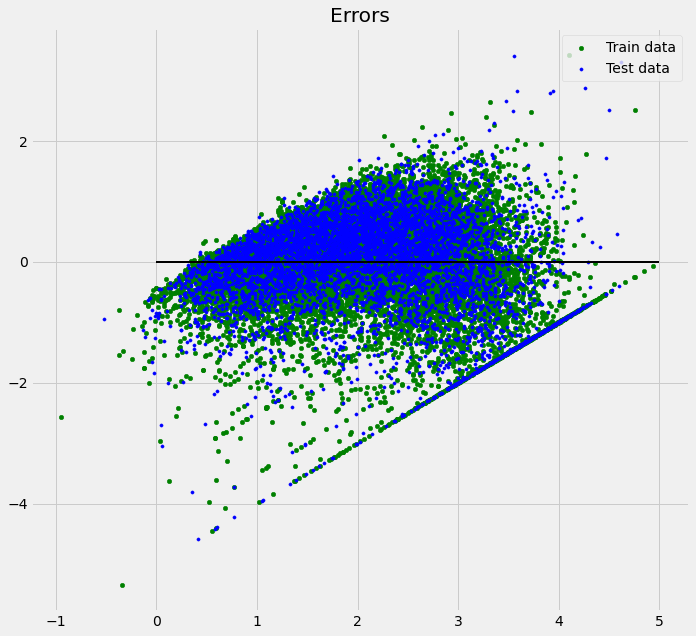

In [29]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, color = "green", s = 20, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Errors") 
plt.show() 

Convert to array form

In [30]:
y = new_data.loc[:,['Target']].values 
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y.ravel(), test_size = 0.3, random_state = 0)

Calculate accuracy

In [32]:
values = []

best_svr = SVR(kernel='rbf')

cv = KFold(n_splits=10, random_state=None, shuffle=True)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    best_svr.fit(X_train, y_train)
    values.append(best_svr.score(X_test, y_test.ravel()))

Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [    5    19    21 ... 20605 20606 20620]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [    6     8    36 ... 20598 20604 20618]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20636 20637 20638] 

Test Index:  [    3     4    13 ... 20623 20627 20639]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    1     2     3 ... 20636 20638 20639] 

Test Index:  [    0    31    37 ... 20631 20633 20637]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [    9    10    11 ... 20593 20607 20622]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     2     3 ... 20637 20638 20639] 

Test Index:  [    1    27    28 ... 20584 20609 20615]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20636 20637 20639] 

Test Index:  [   18    23    42 ... 20619 20621 20638]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [   17    25    35 ... 20590 20634 20635]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     3 ... 20637 20638 20639] 

Test Index:  [    2     7    12 ... 20629 20630 20632]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [   26    33    40 ... 20613 20614 20636]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy

In [33]:
print(np.mean(values))

0.6954070942068724


With an increase in k, accuracy decreases.

In [34]:
value=cross_val_score(best_svr, X, y.ravel(), cv=20)
print(np.mean(value))

KeyboardInterrupt: ignored